Oasis Infobyte -Data Science Internship

Task 5 - Sales Prediction using Python

Author- **Shirsath Vaishnavi**

In [1]:
from google.colab import drive


In [2]:
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [4]:
data = pd.read_csv("/content/drive/MyDrive/Advertising.csv")


In [5]:
data.head()


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
data.shape


(200, 5)

In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
data.isnull().sum()


Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [9]:
mode_of_outlet_size = data.pivot_table(values = 'Newspaper', columns= 'TV', aggfunc= (lambda x: x.mode()[0]))


In [10]:
print(mode_of_outlet_size)


TV         0.7    4.1    5.4    7.3    7.8    8.4    8.6    8.7    11.7   \
Newspaper    8.7    5.7    9.4   41.4   50.6    2.1    1.0   75.0   45.2   

TV         13.1   ...  281.4  283.6  284.3  286.0  287.6  289.7  290.7  292.9  \
Newspaper   25.6  ...   55.8   66.2    6.4    3.7   71.8   51.2    8.5   43.2   

TV         293.6  296.4  
Newspaper    1.8  100.9  

[1 rows x 190 columns]


In [11]:
missing_values = data['Newspaper'].isnull()


In [12]:
print(missing_values)


0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Name: Newspaper, Length: 200, dtype: bool


In [13]:
data.loc[missing_values, 'TV'] = data.loc[missing_values, 'Newspaper'].apply(lambda x: mode_of_outlet_size)


In [14]:
data.isnull().sum()


Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [15]:
data.describe()


,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


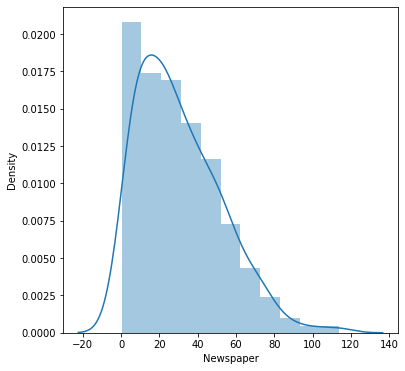

In [16]:
plt.figure(figsize = (6,6))
sns.distplot(data['Newspaper'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


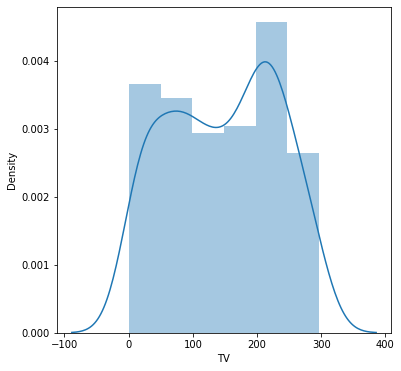

In [17]:
plt.figure(figsize = (6,6))
sns.distplot(data['TV'])
plt.show()

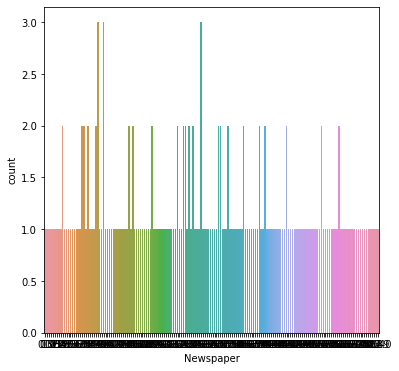

In [18]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'Newspaper', data = data)
plt.show()

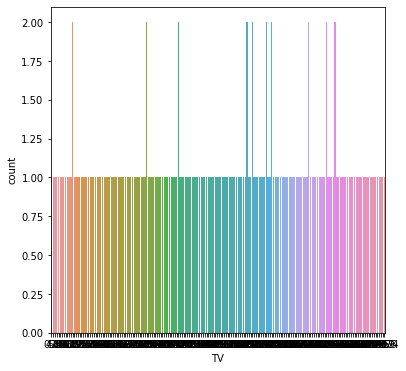

In [19]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'TV', data = data)
plt.show()

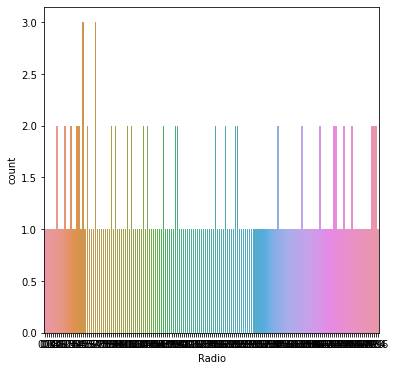

In [20]:

plt.figure(figsize=(6,6))
sns.countplot(x = 'Radio', data = data)
plt.show()

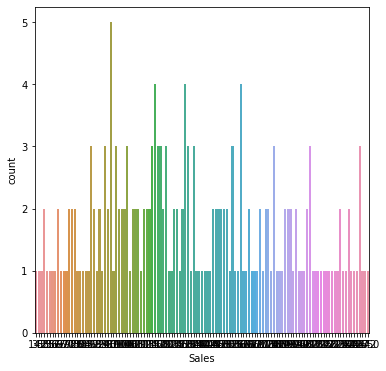

In [21]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'Sales', data = data)
plt.show()
     

In [22]:
data.head()


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [23]:
X = data.drop(columns='Sales',axis=1)
Y = data['Sales']

In [24]:

print(X)


     Unnamed: 0     TV  Radio  Newspaper
0             1  230.1   37.8       69.2
1             2   44.5   39.3       45.1
2             3   17.2   45.9       69.3
3             4  151.5   41.3       58.5
4             5  180.8   10.8       58.4
..          ...    ...    ...        ...
195         196   38.2    3.7       13.8
196         197   94.2    4.9        8.1
197         198  177.0    9.3        6.4
198         199  283.6   42.0       66.2
199         200  232.1    8.6        8.7

[200 rows x 4 columns]


In [25]:
x_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [26]:
print(X.shape, x_train.shape, X_test.shape)


(200, 4) (160, 4) (40, 4)


In [27]:
regressor = XGBRegressor()


In [28]:
regressor.fit(x_train, Y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [29]:
Newspaper_data_prediction = regressor.predict(x_train)


In [30]:
r2_train = metrics.r2_score(Y_train, Newspaper_data_prediction)


In [31]:
print('R Squared value = ',r2_train)


R Squared value =  0.9999999499455579


In [32]:
test_data_prediction = regressor.predict(X_test)


In [33]:
r2_test = metrics.r2_score(Y_test, test_data_prediction)


In [34]:
print('R Squared value = ',r2_test)


R Squared value =  0.9656705458759971
